In [1]:
!ls

DONE              carlo.ipynb       readConfig.py     script.slurm
RUNNING           config.json       register.csv
TODO              consumeTask.py    run.sh
__pycache__       manageRegister.py runAll.sh


In [43]:
import os, glob
import numpy as np

files = glob.glob("./DONE/*/*.pickle")

files

['./DONE/YAGO310_0_ComplEx_betweenness_-0.05/instance.pickle',
 './DONE/YAGO310_0_ComplEx_betweenness_-0.1/instance.pickle',
 './DONE/YAGO310_0_TransE_degree_-0.15/instance.pickle',
 './DONE/YAGO310_0_ComplEx_pagerank_-0.1/instance.pickle',
 './DONE/YAGO310_0_ComplEx_pagerank_-0.05/instance.pickle',
 './DONE/YAGO310_0_TransE_degree_-0.2/instance.pickle',
 './DONE/YAGO310_0_TransE_degree_0.05/instance.pickle',
 './DONE/YAGO310_0_ComplEx_pagerank_0.01/instance.pickle',
 './DONE/YAGO310_0_TransE_harmonic_centrality_0.1/instance.pickle',
 './DONE/YAGO310_0_TransE_pagerank_0.1/instance.pickle',
 './DONE/YAGO310_0_TransE_degree_0.03/instance.pickle',
 './DONE/YAGO310_0_ComplEx_degree_0.1/instance.pickle',
 './DONE/YAGO310_0_ComplEx_betweenness_0.01/instance.pickle',
 './DONE/YAGO310_0_TransE_betweenness_-0.05/instance.pickle',
 './DONE/YAGO310_0_ComplEx_degree_0.01/instance.pickle',
 './DONE/YAGO310_0_TransE_harmonic_centrality_0.03/instance.pickle',
 './DONE/YAGO310_0_ComplEx_degree_-0.05/i

In [62]:
%%time

import pickle

rows = []

for f in files:
    with open(f, 'rb') as ff:
        d = pickle.load(ff)

        rows.append((d['dataset'],
                     d['c_split'],
                     d['property'],
                     d['value'],
                     d['model'],
                     d['results']['both']['realistic']['mrr'],
                     d['results_min']['both']['realistic']['mrr']
                     ))

KeyError: 'mrr'

In [63]:
d['results']['both']

{'optimistic': {'inverse_arithmetic_mean_rank': 3.183473389379137e-05,
  'geometric_mean_rank': 7562.445922319635,
  'arithmetic_mean_rank': 31412.230532105277,
  'z_inverse_harmonic_mean_rank': 1273.2871791434645,
  'count': 213454.0,
  'standard_deviation': 37474.12908268352,
  'adjusted_arithmetic_mean_rank_index': 0.4874472553629746,
  'median_rank': 9112.0,
  'z_arithmetic_mean_rank': 389.7009215991653,
  'harmonic_mean_rank': 97.93148919465631,
  'inverse_harmonic_mean_rank': 0.01021122019305069,
  'median_absolute_deviation': 13152.164280363195,
  'adjusted_arithmetic_mean_rank': 0.5125606984276803,
  'z_geometric_mean_rank': 384.8283449494302,
  'inverse_geometric_mean_rank': 0.0001322323505214923,
  'adjusted_inverse_harmonic_mean_rank': 0.010111626657113858,
  'variance': 1404310350.5056264,
  'adjusted_geometric_mean_rank_index': 0.8320738032968953,
  'inverse_median_rank': 0.00010974539069359087,
  'hits_at_1': 0.006352656778509655,
  'hits_at_3': 0.01014738538514153,
  'hi

In [60]:
import pandas as pd

df = pd.DataFrame(rows, columns = ['dataset', 'split', 'property', 'valuee', 'model', 'h10', 'h10_min'])

df['delta'] = df['h10'] / df['h10_min']

In [65]:
df[df['property'] == 'baseline']

,dataset,split,property,valuee,model,h10,h10_min,delta
28,YAGO310,0,baseline,0.0,ComplEx,0.014449,0.014449,1.0
39,YAGO310,0,baseline,0.0,TransE,0.447062,0.447062,1.0


In [53]:
import seaborn as sns

def jitter(values,j=0.001):
    return values + np.random.normal(j,0.001,values.shape)

<Axes: xlabel='valuee', ylabel='delta'>

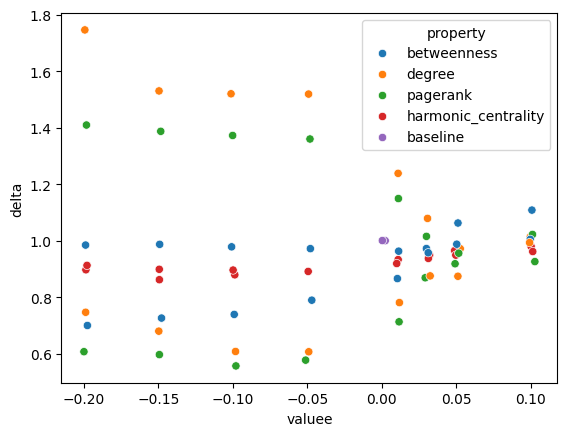

In [54]:
sns.scatterplot(df, x=jitter(df['valuee']), y=jitter(df['delta']), hue='property')

<Axes: xlabel='valuee', ylabel='delta'>

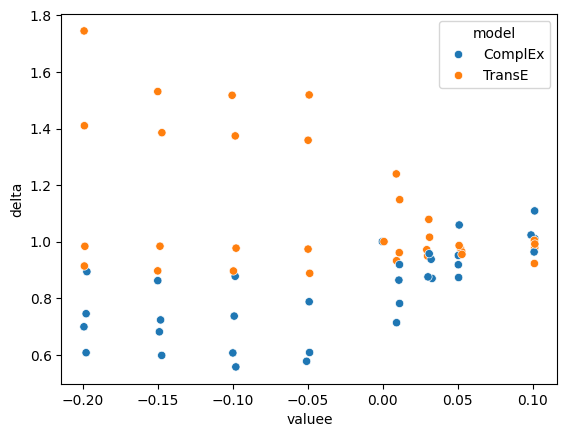

In [55]:
sns.scatterplot(df, x=jitter(df['valuee']), y=jitter(df['delta']), hue='model')

In [7]:
df2 = pd.melt(df, id_vars=['dataset', 'split', 'property', 'model', 'valuee'], value_vars=['h10', 'h10_min'])

# ci ho messo 10 minuti a fare la tabellina...

,dataset,split,property,model,valuee,variable,value
0,YAGO310,0,betweenness,ComplEx,-0.05,h10,0.015732
1,YAGO310,0,betweenness,ComplEx,-0.10,h10,0.015801
2,YAGO310,0,degree,TransE,-0.15,h10,0.457887
3,YAGO310,0,pagerank,ComplEx,-0.10,h10,0.015550
4,YAGO310,0,pagerank,ComplEx,-0.05,h10,0.015446
...,...,...,...,...,...,...,...
125,YAGO310,0,betweenness,ComplEx,0.10,h10_min,0.037581
126,YAGO310,0,degree,TransE,0.10,h10_min,0.283881
127,YAGO310,0,pagerank,TransE,0.03,h10_min,0.354395
128,YAGO310,0,betweenness,ComplEx,-0.15,h10_min,0.020385


<Axes: xlabel='None', ylabel='value'>

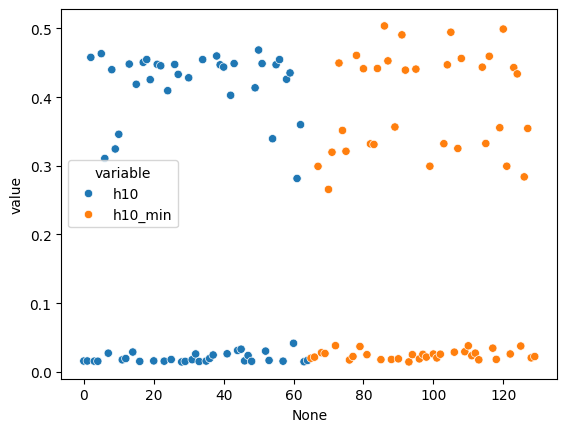

In [14]:
sns.scatterplot(df2, x=df2.index, y='value', hue='variable')